In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [6]:
df = pd.read_csv('D:/Personal-GIT/data/kaggle_toxic/train.csv')
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


### Tokenize Words - Check Distribution of Words

In [14]:
df['token_list'] = df['comment_text'].apply(lambda x: nltk.word_tokenize(x))
all_tokens = [item for sublist in df['token_list'] for item in sublist]
vocab_all = nltk.FreqDist(all_tokens)

['Explanation',
 'Why',
 'the',
 'edits',
 'made',
 'under',
 'my',
 'username',
 'Hardcore',
 'Metallica',
 'Fan',
 'were',
 'reverted',
 '?',
 'They',
 'were',
 "n't",
 'vandalisms',
 ',',
 'just',
 'closure',
 'on',
 'some',
 'GAs',
 'after',
 'I',
 'voted',
 'at',
 'New',
 'York',
 'Dolls',
 'FAC',
 '.',
 'And',
 'please',
 'do',
 "n't",
 'remove',
 'the',
 'template',
 'from',
 'the',
 'talk',
 'page',
 'since',
 'I',
 "'m",
 'retired',
 'now.89.205.38.27',
 "D'aww",
 '!',
 'He',
 'matches',
 'this',
 'background',
 'colour',
 'I',
 "'m",
 'seemingly',
 'stuck',
 'with',
 '.',
 'Thanks',
 '.',
 '(',
 'talk',
 ')',
 '21:51',
 ',',
 'January',
 '11',
 ',',
 '2016',
 '(',
 'UTC',
 ')',
 'Hey',
 'man',
 ',',
 'I',
 "'m",
 'really',
 'not',
 'trying',
 'to',
 'edit',
 'war',
 '.',
 'It',
 "'s",
 'just',
 'that',
 'this',
 'guy',
 'is',
 'constantly',
 'removing',
 'relevant',
 'information',
 'and',
 'talking',
 'to',
 'me',
 'through',
 'edits',
 'instead',
 'of',
 'my',
 'talk',
 'pa

In [25]:
vocab_words = {k: v for k, v in vocab.items() if k.isalpha()}
vocab_words = {k: v for k, v in sorted(vocab_words.items(), key=lambda item: item[1], reverse=True)}
vocab_series = pd.Series(dict(vocab_words))
vocab_series

the             448579
to              291427
I               222434
of              220449
and             211355
                 ...  
automakers           1
Boastful             1
Superlatives         1
Classifying          1
CIU                  1
Length: 199354, dtype: int64

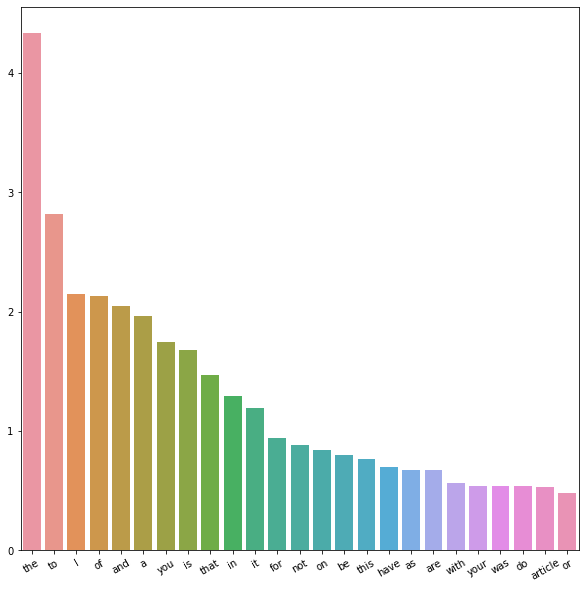

In [39]:
fig, ax = plt.subplots(figsize=(10,10))
vocab_series_top = vocab_series[:25]
all_plot = sns.barplot(x=vocab_series_top.index, y=100*vocab_series_top.values/sum(vocab_series.values), ax=ax)
plt.xticks(rotation=30);